In [1]:
import os
import glob as glob

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import nibabel as nib
import nipype.interfaces.fsl as fsl
from nilearn import image, plotting
from nistats.design_matrix import make_first_level_design_matrix
from nistats.reporting import plot_design_matrix,  plot_contrast_matrix
from nistats.first_level_model import FirstLevelModel
from nilearn.plotting import plot_stat_map, plot_anat, plot_img


sub_path = '/home/finc/Dropbox/Projects/SelfReg/data/neuroimaging/sub-s358/' 
#fmri = '/home/finc/Dropbox/Projects/SelfReg/data/neuroimaging/sub-s358/sub-s358_ses-2_task-surveyMedley_run-1_bold_space-MNI152NLin2009cAsym_preproc.nii.gz'

/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/finc/anaconda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Confounds preparation
==============================

In [2]:
confounds = pd.read_csv(glob.glob(f'{sub_path}*surveyMedley*.tsv')[0],  sep = '\t')
confounds_clean = pd.DataFrame(confounds, columns=['FramewiseDisplacement', 'X', 'Y', 'Z', 'RotX', 'RotY', 'RotZ'])
confounds_clean['FramewiseDisplacement'][0] = 0
confounds_clean.head()

FramewiseDisplacement         X         Y         Z      RotX      RotY  \
0               0.000000 -0.007383 -0.009284 -0.065939  0.000000  0.000195   
1               0.042951 -0.007773 -0.036050 -0.074774  0.000000  0.000276   
2               0.059959  0.000032 -0.063143 -0.074306 -0.000289  0.000255   
3               0.040944 -0.000132 -0.063158 -0.048765 -0.000419  0.000240   
4               0.051341 -0.007949 -0.045443 -0.032768 -0.000517  0.000175   

       RotZ  
0 -0.000239  
1 -0.000181  
2  0.000000  
3 -0.000160  
4 -0.000127

Design matrix preparation
==============================

In [3]:
tr = 0.68
n_scans = 602
frame_times = np.arange(n_scans) * tr
events_raw = pd.read_csv('/home/finc/Dropbox/Projects/SelfReg/data/behavioral/prep/sub-s358/sub-s358_surveyMedley_events.csv')

events = pd.DataFrame(events_raw, columns=['onset', 'duration', 'trial_type'])

events.head()

onset  duration trial_type
0   1.006     3.982        Q15
1  10.077     3.982        Q33
2  20.371     3.982        Q31
3  32.161     3.982        Q09
4  41.368     3.982        Q40

Fitrst level analysis
=================================

In [4]:
fmri = glob.glob(f'{sub_path}*surveyMedley*bold_space-MNI152NLin2009cAsym_preproc.nii.gz')[0]
#fmri_img = image.index_img(fmri, 0)
#plotting.plot_stat_map(fmri_img)

In [5]:
nib.load(fmri).shape

(89, 105, 89, 602)

In [6]:
# define the model
fmri_glm = FirstLevelModel(tr, 
                           noise_model='ar1',
                           standardize=False, 
                           hrf_model='glover',
                           drift_model=None,
                           period_cut=160,
                          )

fmri_glm = fmri_glm.fit(fmri, events, confounds=confounds_clean)

/home/finc/anaconda/lib/python3.6/site-packages/nistats/hemodynamic_models.py:268: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  frame_times.max() * (1 + 1. / (n - 1)), n_hr)
/home/finc/anaconda/lib/python3.6/site-packages/nistats/hemodynamic_models.py:55: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  time_stamps = np.linspace(0, time_length, float(time_length) / dt)


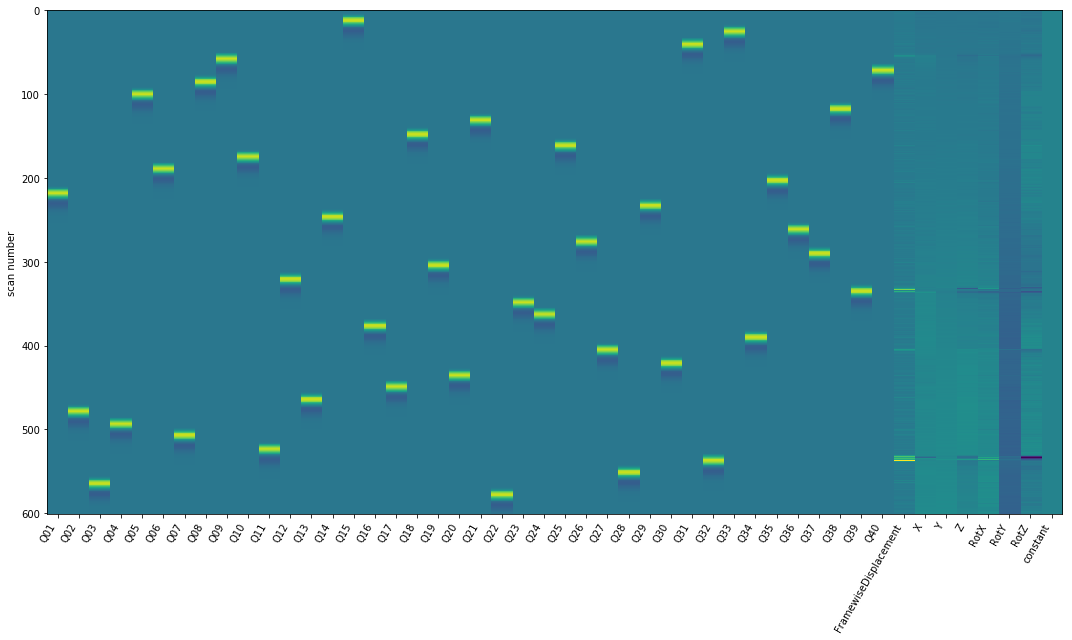

In [7]:
design_matrix = fmri_glm.design_matrices_[0]
fig, ax = plt.subplots(figsize=(15,9))
plot_design_matrix(design_matrix, ax=ax)

In [7]:
design_matrix.corr().iloc[:4,:4]

Q01       Q02       Q03       Q04
Q01  1.000000 -0.017149 -0.017161 -0.017149
Q02 -0.017149  1.000000 -0.017161 -0.149479
Q03 -0.017161 -0.017161  1.000000 -0.017161
Q04 -0.017149 -0.149479 -0.017161  1.000000

Defining contrast
=========================

In [15]:
trial_dummies = pd.get_dummies(design_matrix.columns)
trial_contrasts = pd.DataFrame.to_dict(trial_dummies, orient = 'list')
trial_contrasts['overall'] = [1 if i[0] == 'Q' else 0 for i in design_matrix.columns]

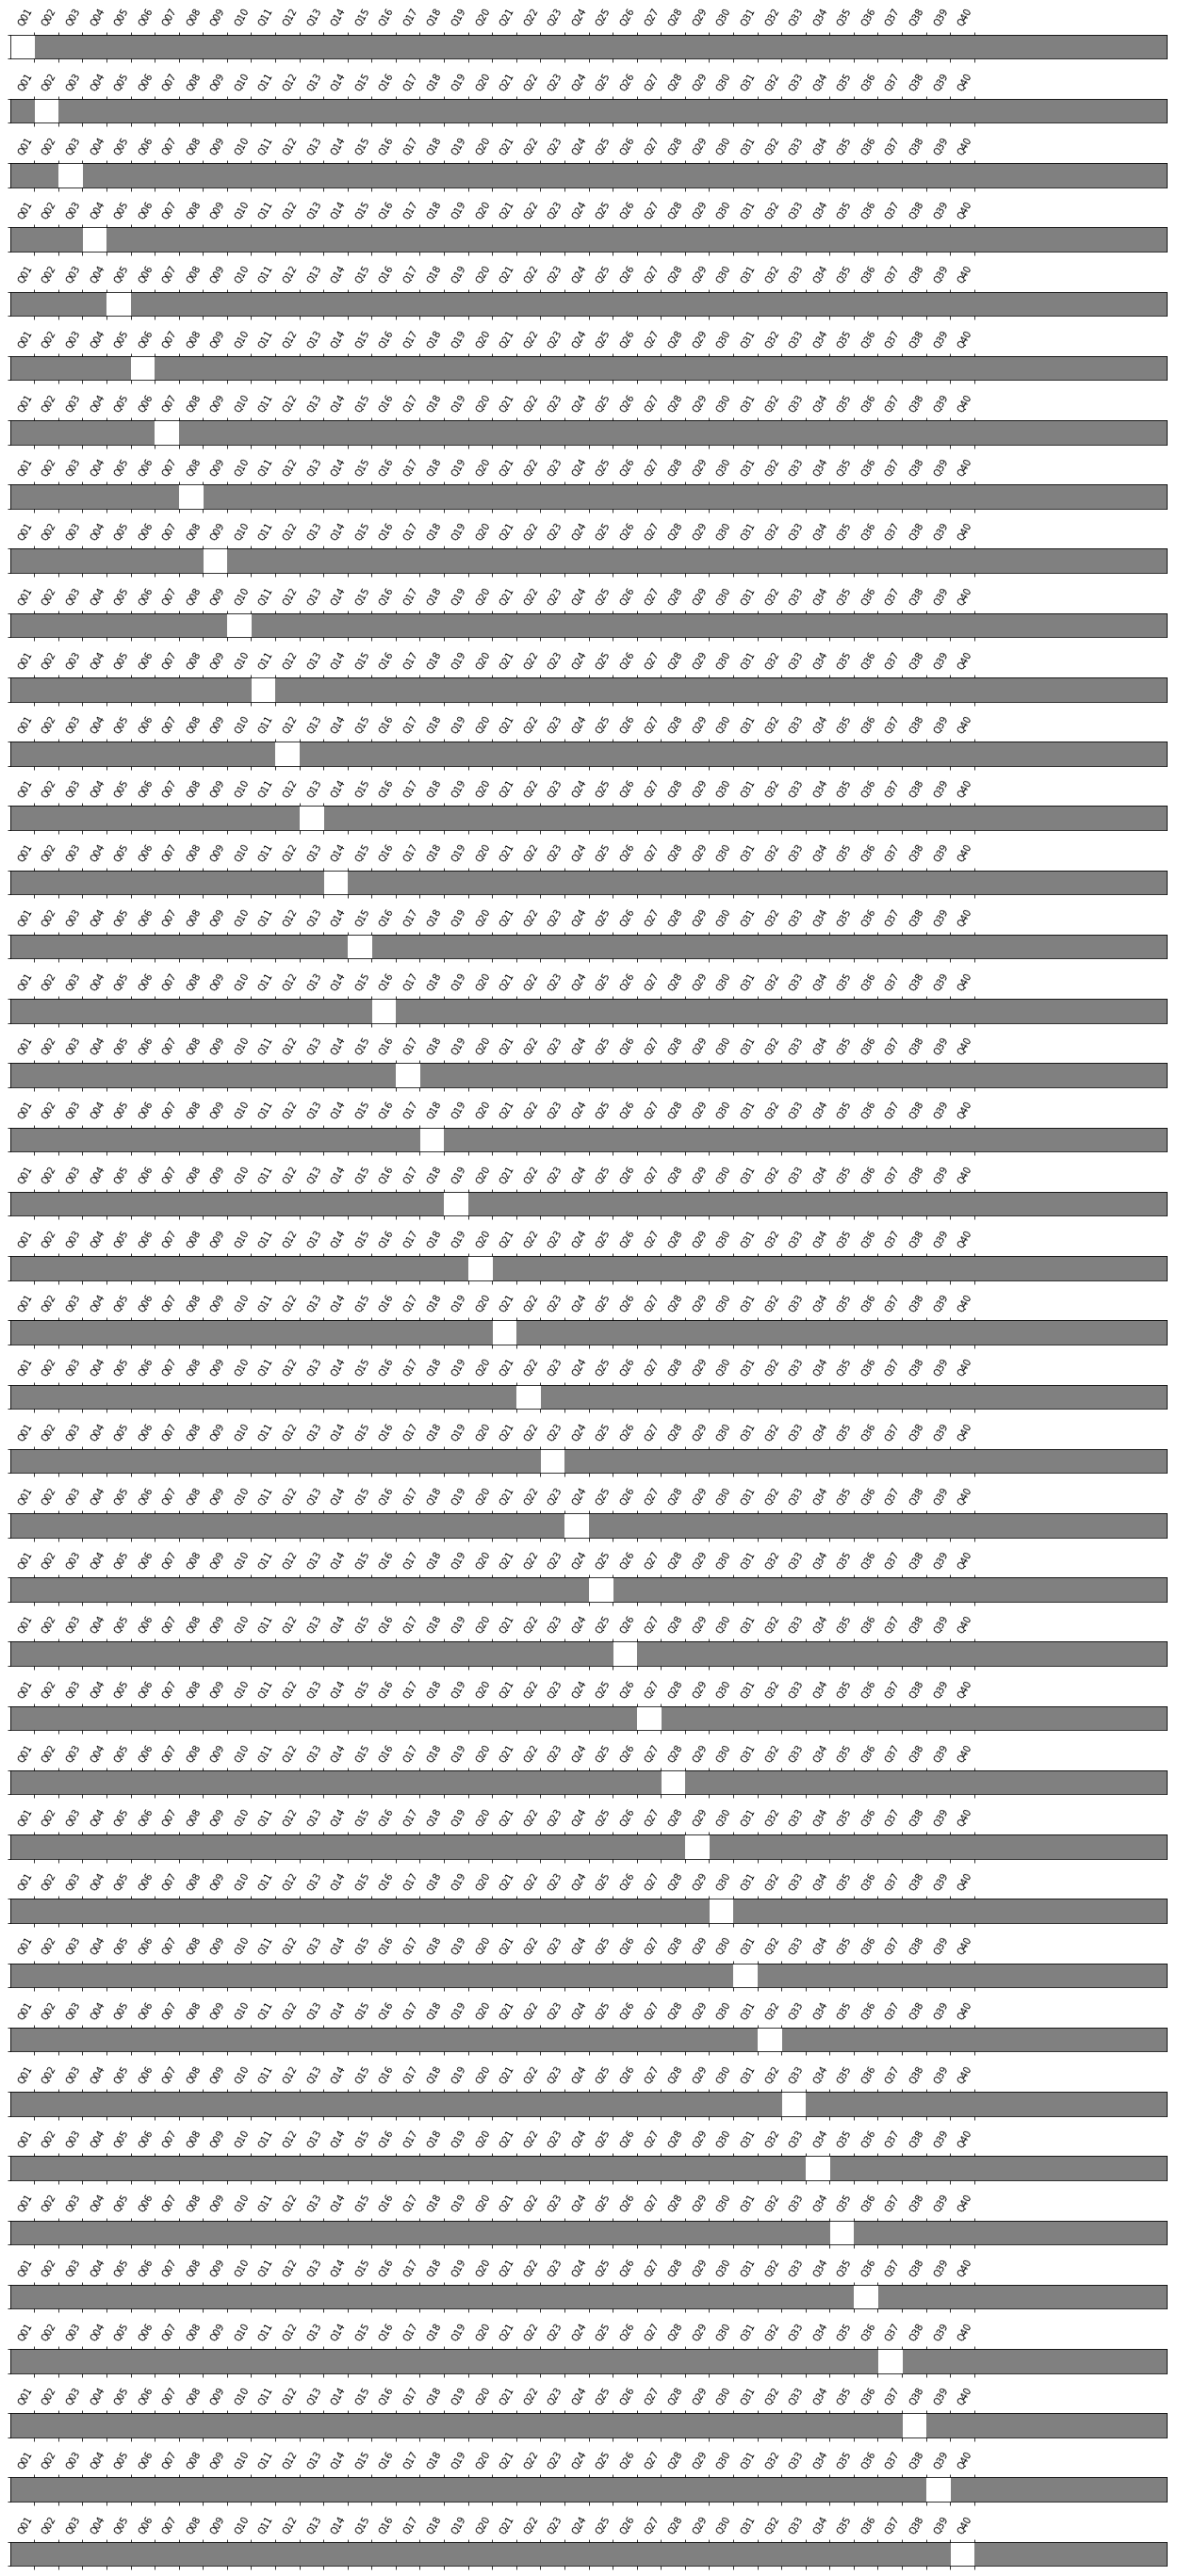

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [16]:
#fig, ax = plt.subplots((40,1) figsize=(20,16))
fig, ax = plt.subplots(40, 1)
fig.set_size_inches(22, 50)

for i in range(40):
    plt.figure()
    _ = plot_contrast_matrix(trial_contrasts['Q{:0>2d}'.format(i+1)] , design_matrix=design_matrix.iloc[:,0:40], ax=ax[i])

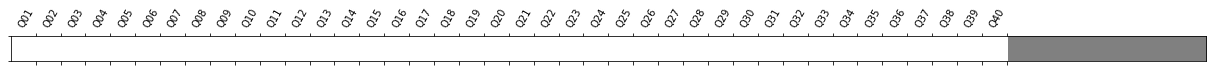

In [13]:
# Overall survey effect contrast

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(17, 30)
plot_contrast_matrix(trial_contrasts['overall'] , design_matrix=design_matrix.iloc[:,0:40], ax = ax)

Trial effects estimation
------------------------------------

In [13]:
betas = np.zeros((40, 89, 105, 89))

for i in range(40):
    beta = fmri_glm.compute_contrast(np.asarray(trial_contrasts['Q{:0>2d}'.format(i+1)]), output_type='z_score')
    betas[i,:,:,:] = beta.get_fdata()

/home/finc/anaconda/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


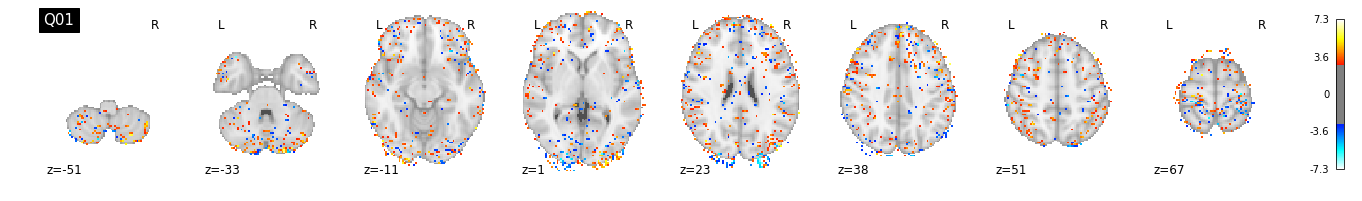

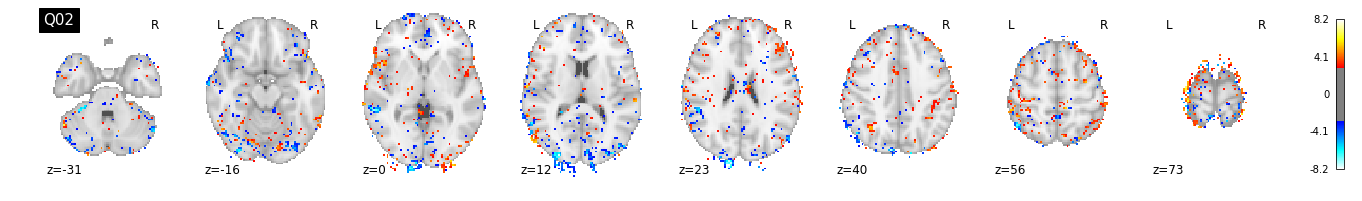

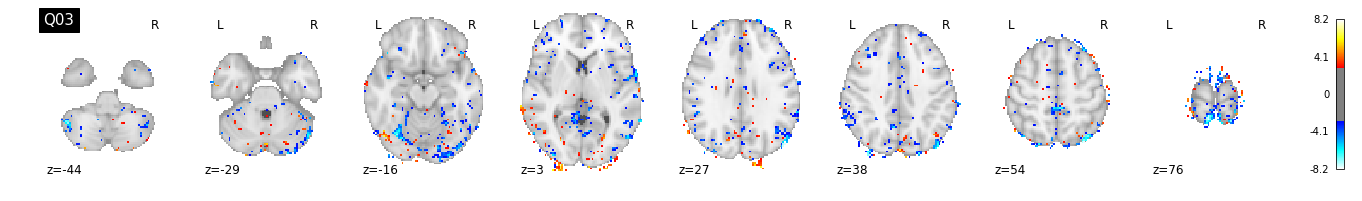

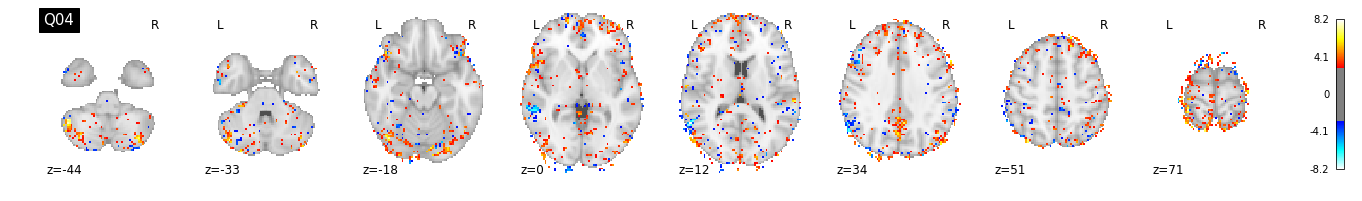

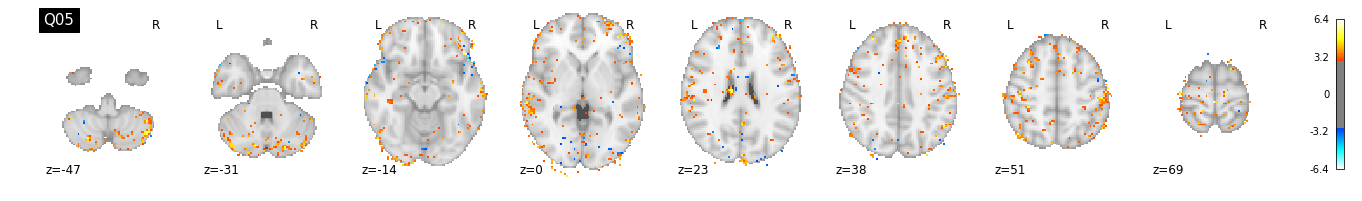

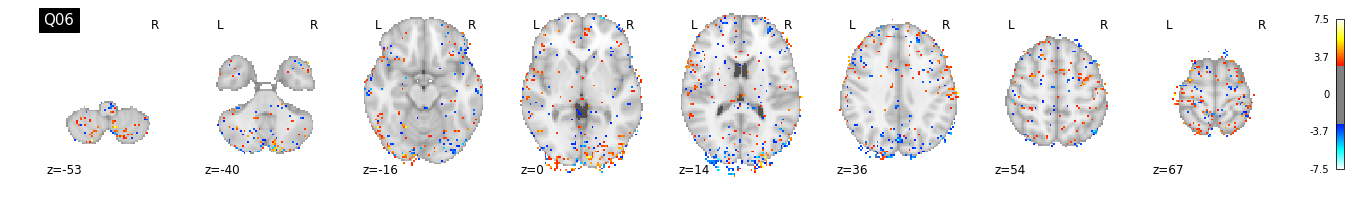

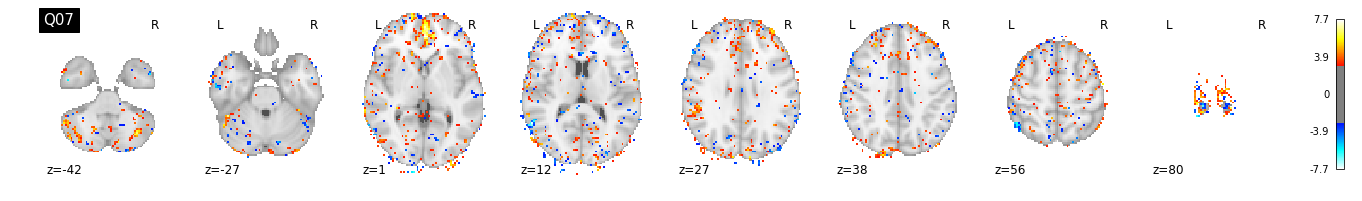

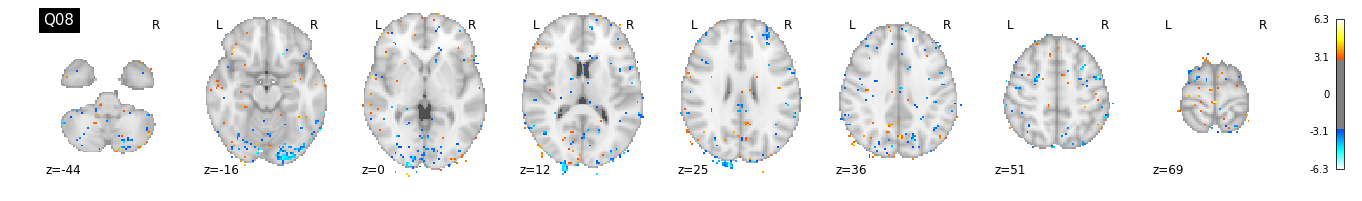

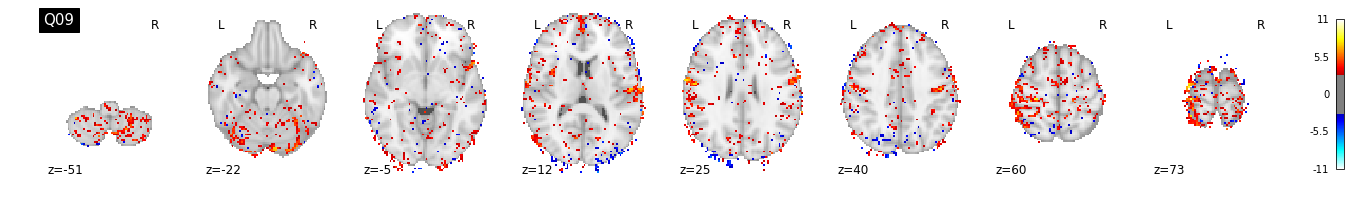

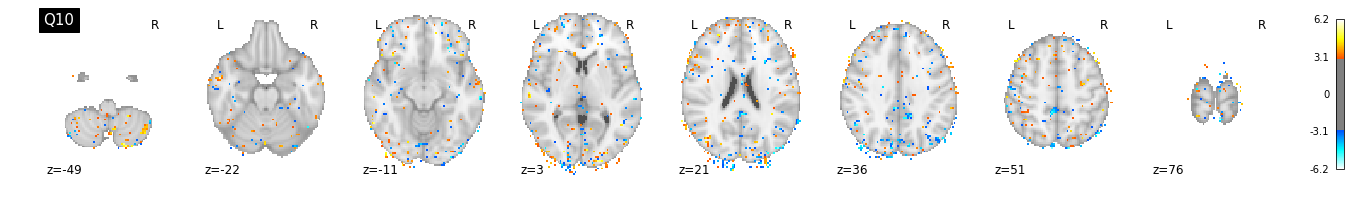

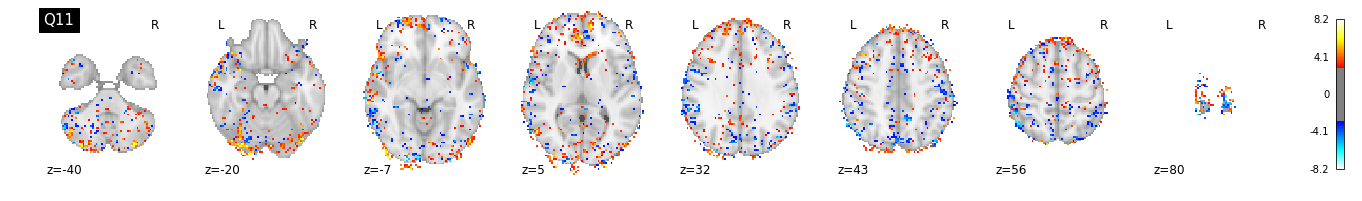

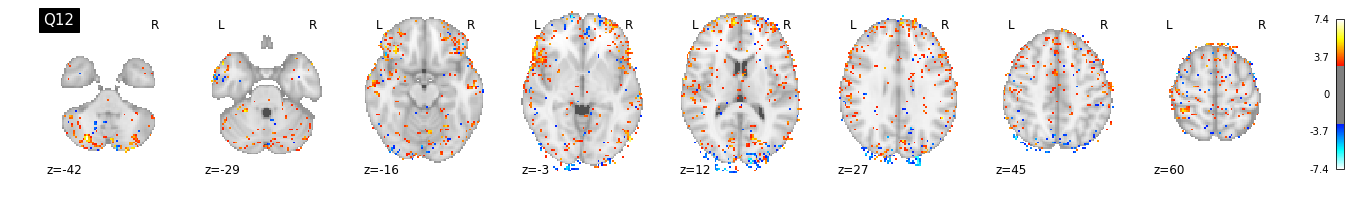

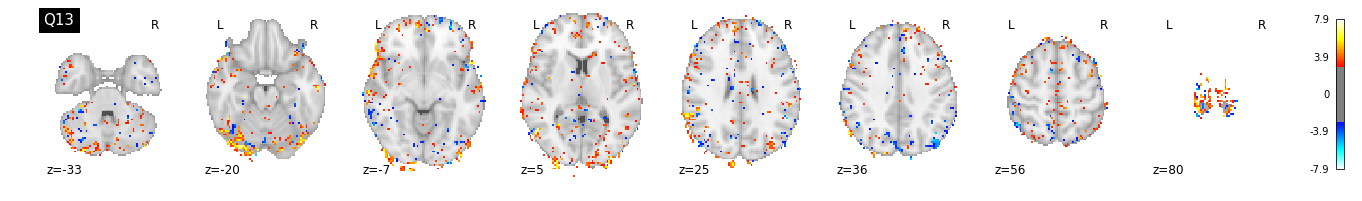

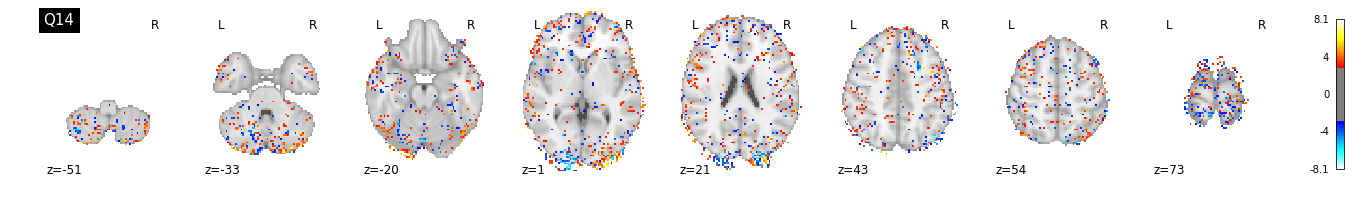

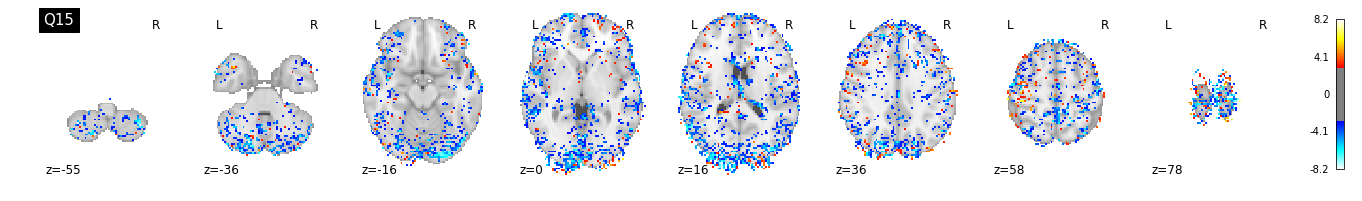

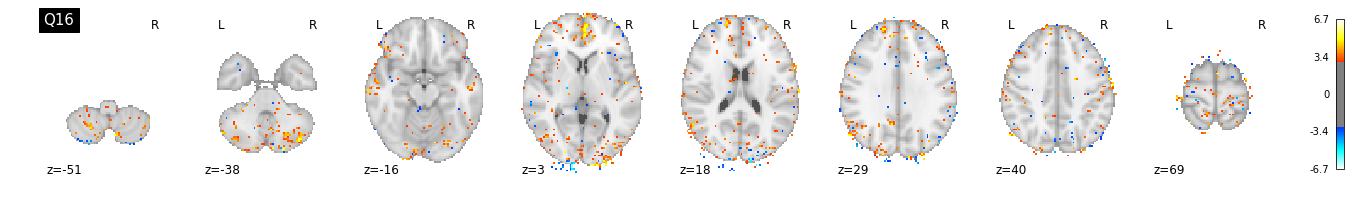

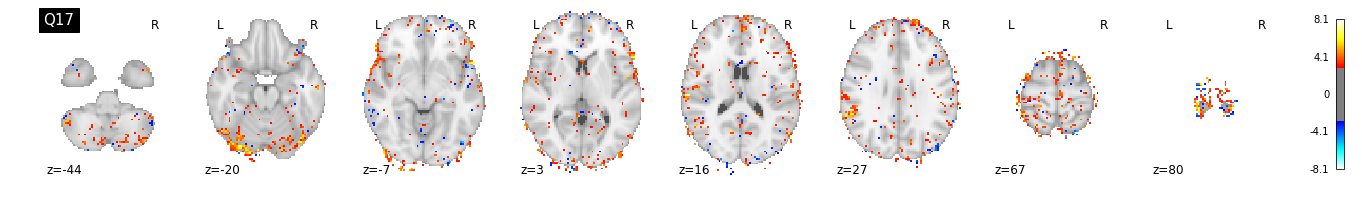

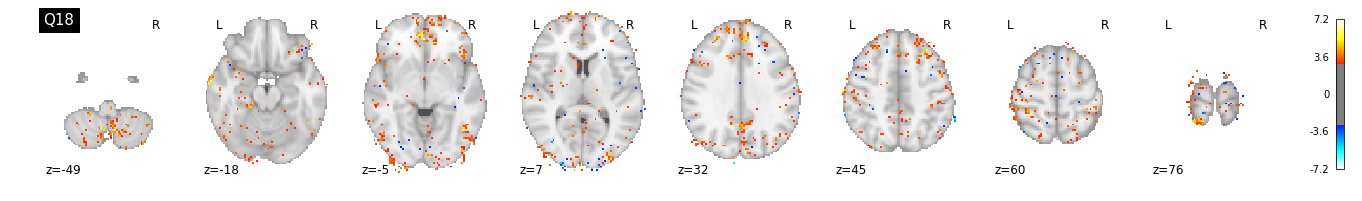

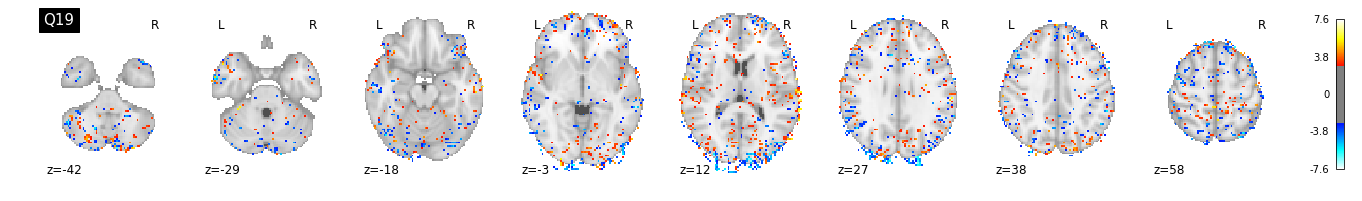

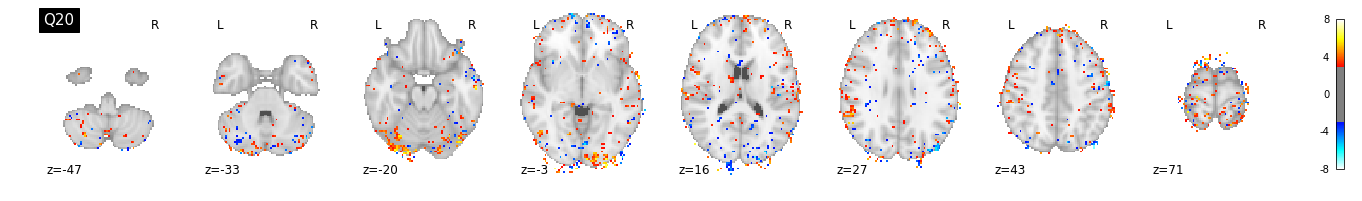

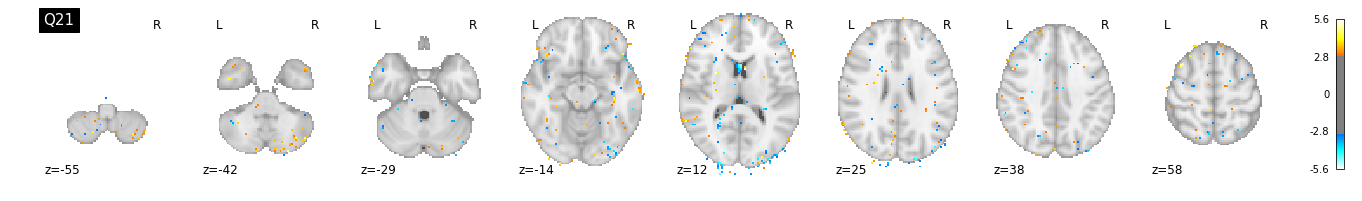

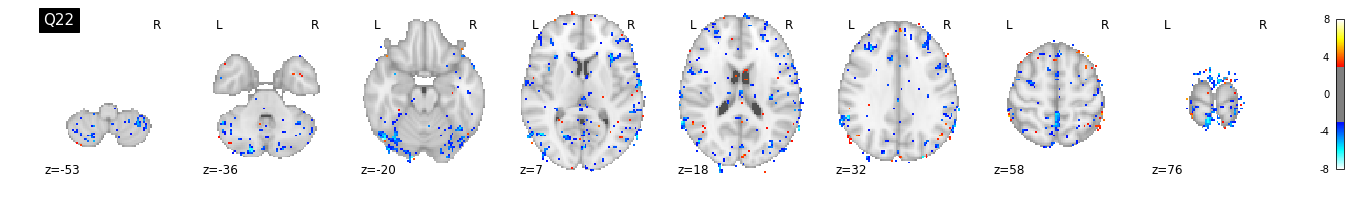

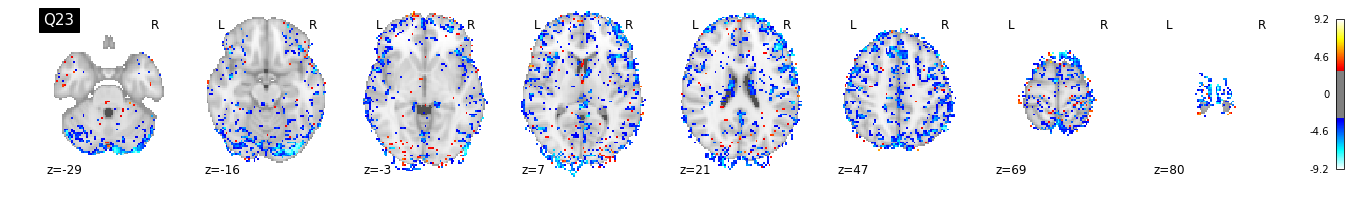

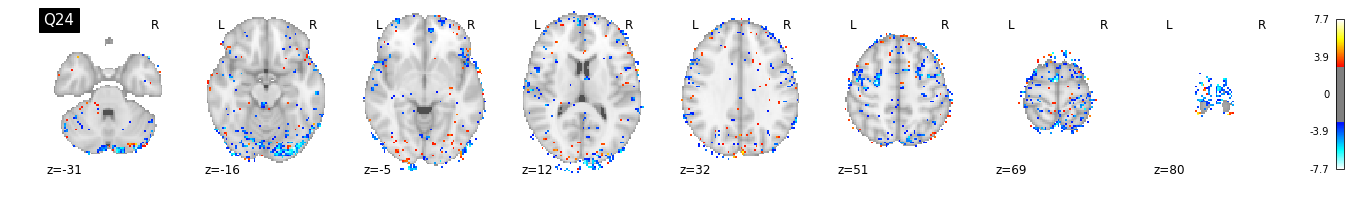

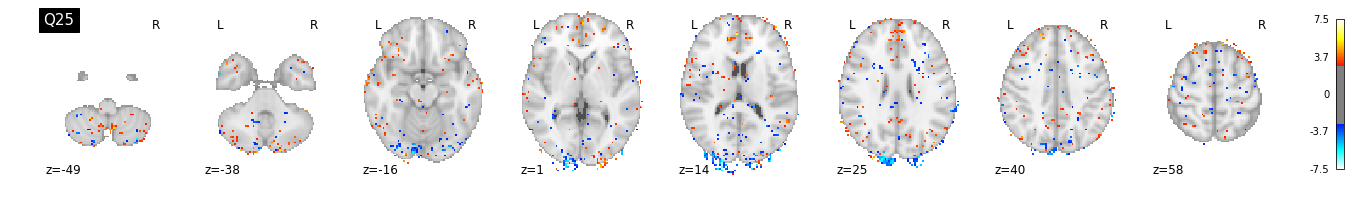

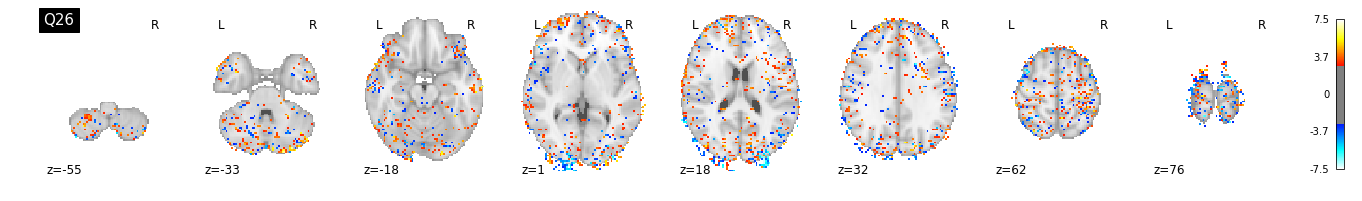

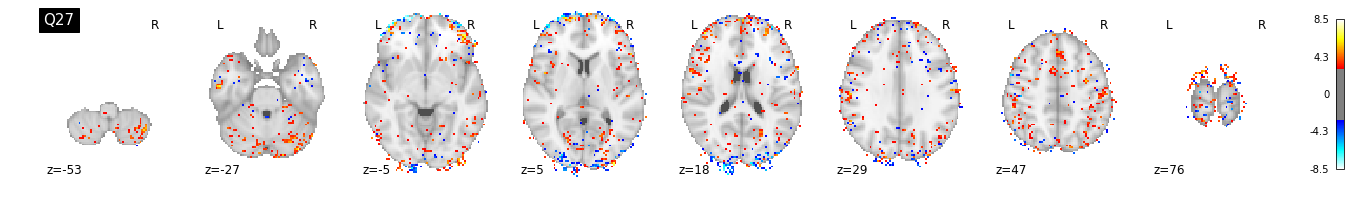

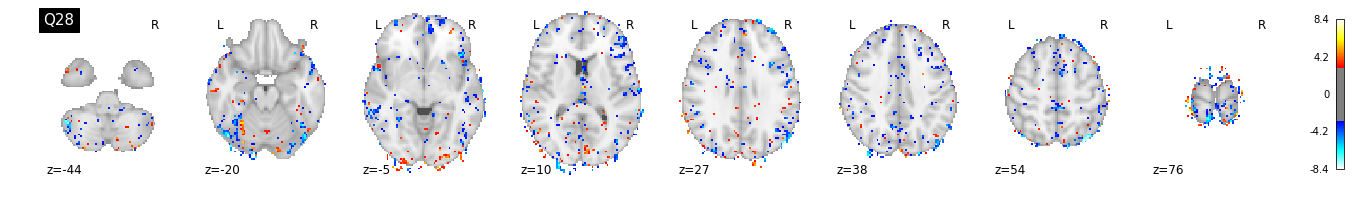

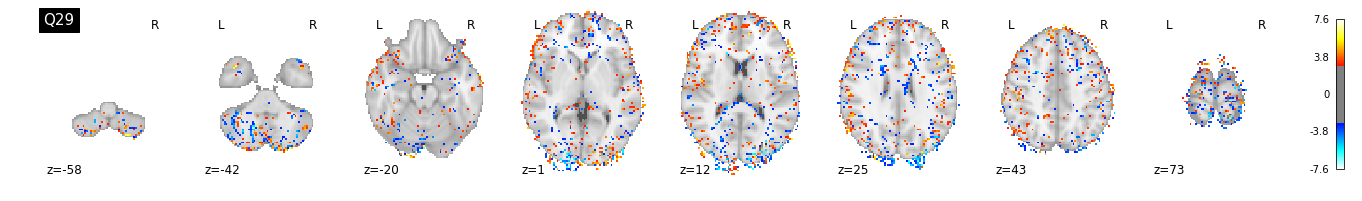

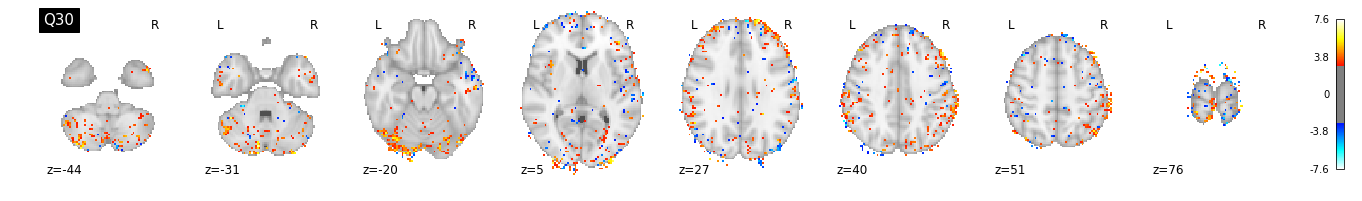

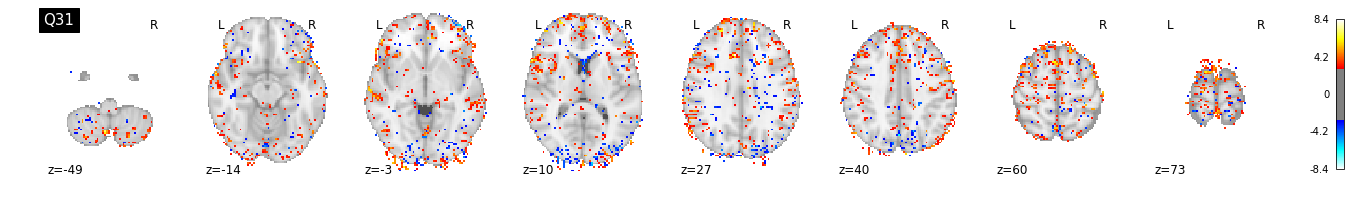

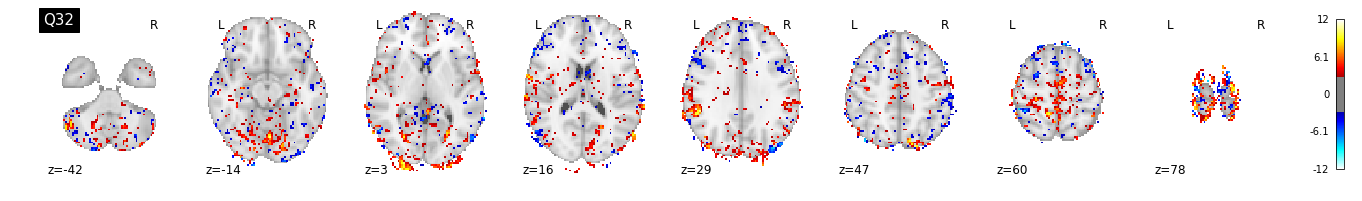

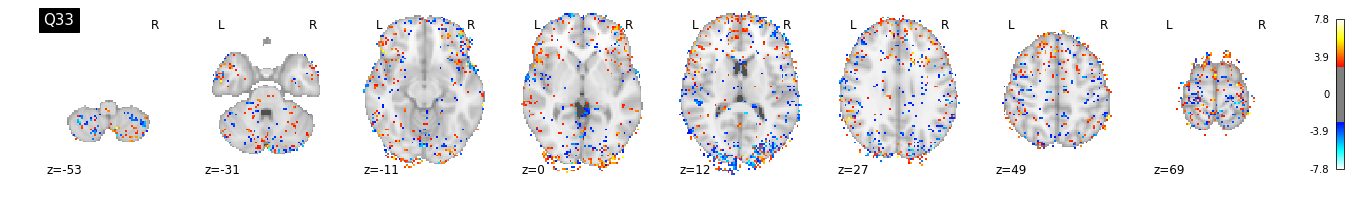

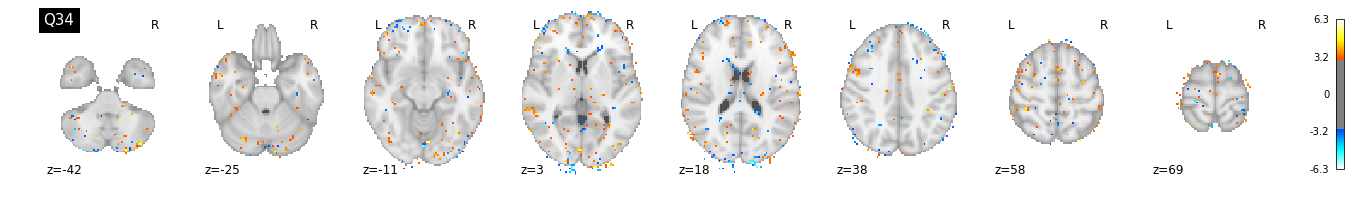

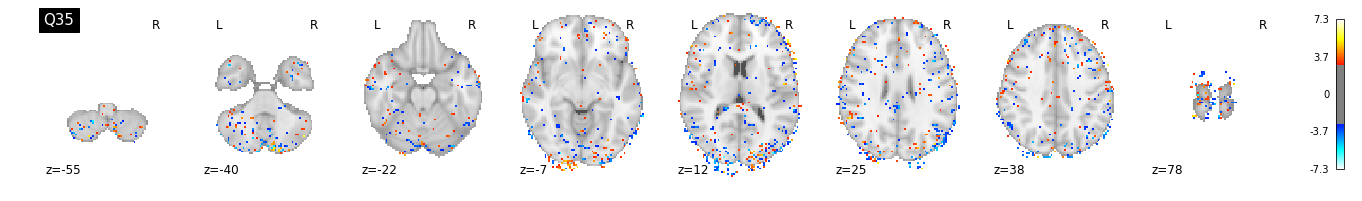

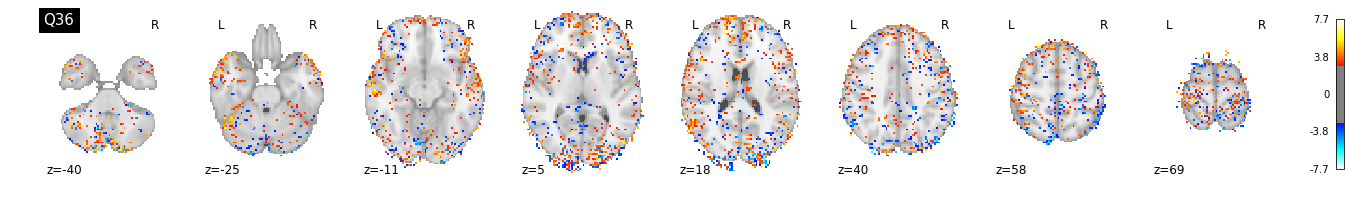

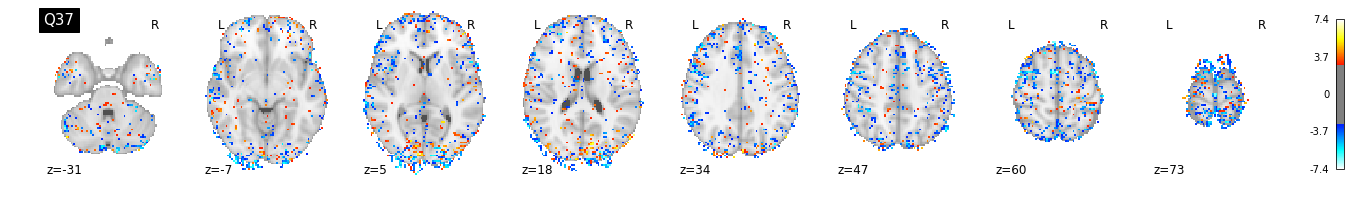

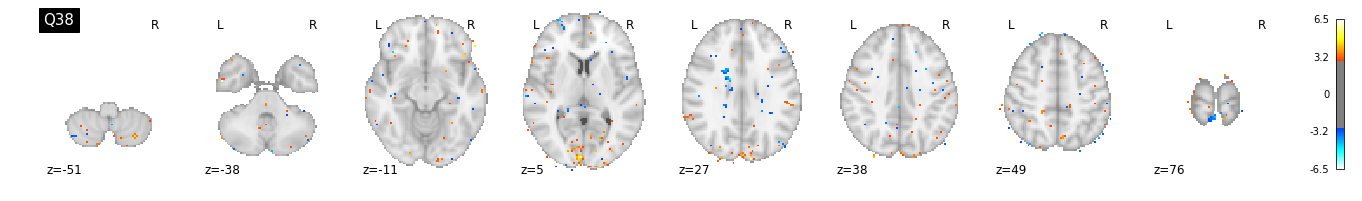

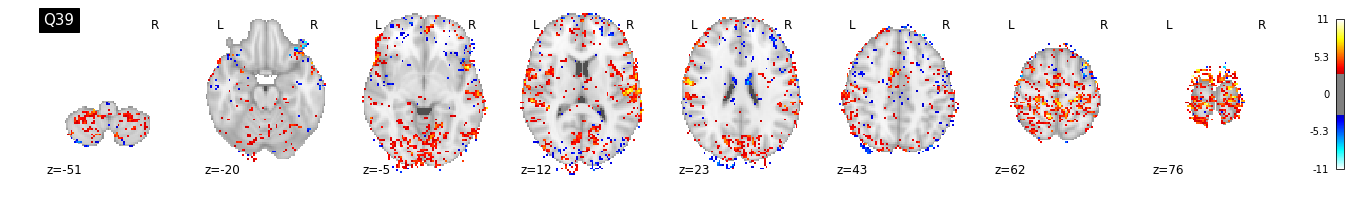

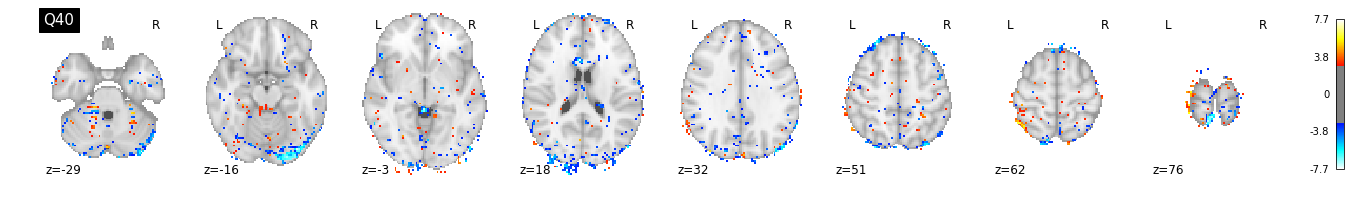

In [14]:
for i in range(40):    
    plot_stat_map(nib.Nifti1Image(betas[i,:,:,:], beta.affine, beta.header), threshold=3,
              display_mode='z', cut_coords=8, black_bg=False,
              title='Q{:0>2d}'.format(i+1))

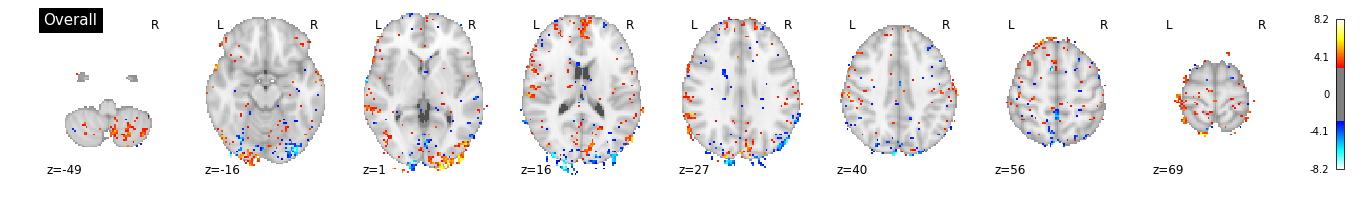

In [16]:
efect_of_survey = fmri_glm.compute_contrast(np.asarray(trial_contrasts['overall']), output_type='z_score')

plot_stat_map(efect_of_survey, threshold=3,
              display_mode='z', cut_coords=8, black_bg=False,
              title='Overall')